<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train__ml_ppo_multi_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.12.1
Uninstalling dask-2024.12.1:
  Successfully uninstalled dask-2024.12.1
Found existing installation: cudf-cu12 25.2.1
Uninstalling cudf-cu12-25.2.1:
  Successfully uninstalled cudf-cu12-25.2.1
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: rapids-dask-dependency 25.2.0
Uninstalling rapids-dask-dependency-25.2.0:
  Successfully uninstalled rapids-dask-dependency-25.2.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: pylibcudf-cu12 25.2.1
Uninstalling pylibcudf-cu12-25.2.1:
  Successfully uninstalled pylibcudf-cu12-25.2.1
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6.0:
  Successfu

In [3]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print(" cuDF Version:", cudf.__version__)
print(" cuML Version:", cuml.__version__)
print(" Dask Version:", dask.__version__)
print(" Stable Baselines3 Installed:", stable_baselines3.__version__)
print(" Gymnasium Version:", gymnasium.__version__)
print(" NumPy Version:", numpy.__version__)
print(" SciPy Version:", scipy.__version__)
print(" Pandas Version:", pandas.__version__)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

 cuDF Version: 24.12.00
 cuML Version: 24.12.00
 Dask Version: 2024.11.2
 Stable Baselines3 Installed: 2.6.0
 Gymnasium Version: 0.29.1
 NumPy Version: 2.1.3
 SciPy Version: 1.15.2
 Pandas Version: 2.2.3


In [2]:
!nvidia-smi

Wed Apr  9 18:26:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#Step 2: Set Environment Paths for CUDA 11.8
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:

try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print(" cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



 cuDF is working and using GPU!


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym  #Use gymnasium instead of gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

#Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

#RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print(" cuDF & cuML are available and running on GPU.")
except ImportError:
    print("cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

#Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  Prevents full allocation
        print(" TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory issue: {e}")

#Google Drive Access (for Colab)
from google.colab import drive


 cuDF & cuML are available and running on GPU.
 TensorFlow GPU memory growth enabled


In [7]:
#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

In [8]:
import os
import time
import numpy as np
import pandas as pd
import yfinance as yf

Ticker List
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

CONFIG = {
    'period': '720d',
    'interval': '1h',
    'strategy_name': "sac_ppo_td3_multi_stock_v1"
}

1.Download Stock Data
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

2.Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

3.Label Creation
def create_trading_labels(df, label_type="multiclass", return_threshold=0.02, shift_period=10):
    df = df.copy()
    df['Future_Close'] = df['Close'].shift(-shift_period)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']

    if label_type == "multiclass":
        df['Target'] = np.select(
            [df['Return'] > return_threshold, df['Return'] < -return_threshold],
            [1, -1],
            default=0
        )
    elif label_type == "binary":
        df['Target'] = np.where(df['Return'] > return_threshold, 1, 0)
    elif label_type == "regression":
        df['Target'] = df['Return']
    else:
        raise ValueError("Invalid label_type. Use 'multiclass', 'binary', or 'regression'.")

    df.drop(columns=["Future_Close", "Return"], inplace=True, errors='ignore')
    return df

4.Run Pipeline for All Stocks
all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            df_labeled = create_trading_labels(df_features, label_type="multiclass")
            all_dfs.append(df_labeled)
        except Exception as e:
            print(f"Feature engineering or labeling failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

5.Combine & Save
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally as multi_stock_feature_engineered_dataset.csv")

    Google Drive path (optional)
    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to: {drive_path}multi_stock_feature_engineered_dataset.csv")
else:
    print("No data was processed.")


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262762, 40)
Saved locally as multi_stock_feature_engineered_dataset.csv
Also saved to: /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [12]:
#Ensure Column Names Are Flattened Correctly
df.columns = df.columns.get_level_values(0) if isinstance(df.columns, pd.MultiIndex) else df.columns

#Remove Named Index (if exists)
df.columns.name = None  Remove 'Price' as the column index name

#Verify Columns After Processing
print("Final Columns in df:", df.columns)

#Ensure 'Close' Exists Before Proceeding
if 'Close' not in df.columns:
    raise KeyError("Column 'Close' not found in the DataFrame after processing.")

#Load Your Dataset
data = df.copy()  Ensure 'df' is loaded before this step

#Add Technical Indicators (RSI & MACD)
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))  Compute RSI
    return rsi  Return computed RSI values

def compute_macd(data, short=12, long=26, signal=9):
    short_ema = data['Close'].ewm(span=short, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['MACD_Signal'] = data['MACD'].ewm(span=signal, adjust=False).mean()

#aaply Indicators to `data`
data['RSI'] = compute_rsi(data)  Ensure RSI is assigned properly
compute_macd(data)  Compute MACD in place

#Drop NaN values to avoid errors in training
data.dropna(inplace=True)

#Verify if 'RSI' column exists
print(data.head())  Print first few rows to check if RSI is present

#Drop non-numeric columns before normalization (keep index intact)
data_numeric = data.select_dtypes(include=[np.number])  Keep only numeric columns

#Normalize only numeric data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numeric)

#Convert back to DataFrame and retain the original index
scaled_df = pd.DataFrame(scaled_data, columns=data_numeric.columns, index=data.index)

#Check if the data looks correct
print(scaled_df.head())


Final Columns in df: Index(['Close', 'High', 'Low', 'Open', 'Volume', 'EMA_10', 'EMA_50'], dtype='object')
         Close        High         Low        Open    Volume      EMA_10  \
13  149.649994  149.679993  148.639999  149.020004  12384262  147.711998   
14  147.990005  150.121994  146.839996  150.000000  21434837  147.765165   
15  148.189896  149.050095  147.854996  147.979996   9018408  147.845634   
16  149.699997  150.580002  147.979996  148.169998  10987991  148.194295   
17  149.559998  150.660004  149.360001  149.710007  10505357  148.449494   

        EMA_50        RSI      MACD  MACD_Signal  
13  146.277033  88.293742  2.072837     1.478203  
14  146.425904  76.805899  2.010006     1.584563  
15  146.572230  74.441845  1.953818     1.658414  
16  146.820812  74.564632  2.007994     1.728330  
17  147.030086  77.042662  2.016389     1.785942  
       Close      High       Low      Open    Volume    EMA_10    EMA_50  \
13  0.186413  0.183056  0.181474  0.181668  0.206225  

In [14]:
import os
import gc
import torch
import pandas as pd
import numpy as np
import yfinance as yf
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

============================
#Setup
============================
drive_path = "/content/drive/MyDrive/TradingData"
os.makedirs(drive_path, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#Config
test_mode = True
test_symbol = 'AAPL'
test_timesteps = 20_000
full_timesteps = 50_000

ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE',
    'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC',
    'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX',
    'IBM', 'GE', 'SBUX', 'ORCL'
]

strategy_name = "ppo_multi_stock_v2"
CONFIG = {
    'period': '720d',
    'interval': '1h',
    'window_size': 10
}
symbols_to_run = [test_symbol] if test_mode else ticker_list
print("Test mode ON" if test_mode else f"Running PPO for {len(symbols_to_run)} stocks.")

#Indicators
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(series, short=12, long=26, signal=9):
    ema_short = series.ewm(span=short, adjust=False).mean()
    ema_long = series.ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line, macd - signal_line

#Data Loader
def load_or_generate_data_fixed(ticker, drive_path, config):
    path = f"{drive_path}/{ticker}_features.csv"
    if os.path.exists(path):
        try:
            df = pd.read_csv(path)
        except Exception as e:
            print(f"Failed to read {ticker}: {e}")
            return None
    else:
        df = yf.download(ticker, period=config['period'], interval=config['interval'])
        if df.empty or len(df) < 100:
            return None
        df.reset_index(drop=True, inplace=True)
        df['EMA_10'] = df['Close'].ewm(span=10).mean()
        df['EMA_50'] = df['Close'].ewm(span=50).mean()
        df['RSI'] = compute_rsi(df['Close'])
        df['MACD'], _, _ = compute_macd(df['Close'])
        df.dropna(inplace=True)
        df.to_csv(path, index=False)

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df.columns.name = None
    df = df.loc[:, ~df.columns.duplicated()]

    required_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_10', 'EMA_50', 'RSI', 'MACD']
    for col in required_cols:
        if col not in df.columns:
            print(f"{ticker}: Missing column {col}")
            return None
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.dropna(inplace=True)
    if len(set(df[col].shape[0] for col in required_cols)) != 1:
        print(f"{ticker}: Column length mismatch")
        return None

    return df

#PPO Main Loop
all_results = []
for ticker in symbols_to_run:
    print(f"\nProcessing {ticker}...")
    df = load_or_generate_data_fixed(ticker, drive_path, CONFIG)
    if df is None or len(df) < 100:
        print(f"Skipping {ticker} due to insufficient data.")
        continue

    train_size = int(0.8 * len(df))
    df_train = df.iloc[:train_size].reset_index(drop=True)
    df_test = df.iloc[train_size:].reset_index(drop=True)

    env_train = DummyVecEnv([
        lambda: gym.make('stocks-v0', df=df_train,
                         frame_bound=(CONFIG['window_size'], len(df_train)),
                         window_size=CONFIG['window_size'])
    ])
    env_test = DummyVecEnv([
        lambda: gym.make('stocks-v0', df=df_test,
                         frame_bound=(CONFIG['window_size'], len(df_test)),
                         window_size=CONFIG['window_size'])
    ])

    ppo_model = PPO(
        "MlpPolicy", env_train, verbose=0,
        learning_rate=0.0003,
        batch_size=256,
        gamma=0.99,
        n_steps=1024,
        ent_coef=0.01,
        vf_coef=0.5,
        clip_range=0.3,
        device='cpu'  Keep on CPU for stability
    )

    ppo_model.learn(total_timesteps=test_timesteps if test_mode else full_timesteps)

    os.makedirs("/content/drive/MyDrive/TradingModels", exist_ok=True)
    ppo_model.save(f"/content/drive/MyDrive/TradingModels/PPO_{ticker}.zip")

    obs = env_test.reset()
    trade_log, portfolio_values = [], []
    balance, position, buy_price = 100000, 0, None

    for i in range(len(df_test)):
        action, _ = ppo_model.predict(obs)
        price = df_test['Close'].iloc[i]
        if action < -0.3 and buy_price is not None:
            trade_log.append("SELL")
            balance = position * price
            position, buy_price = 0, None
        elif action > 0.3 and buy_price is None:
            trade_log.append("BUY")
            position = balance / price
            balance, buy_price = 0, price
        else:
            trade_log.append("HOLD")
        portfolio_values.append(balance if balance > 0 else position * price)

    results_df = pd.DataFrame({
        'Step': range(len(df_test)),
        'Portfolio Value': portfolio_values
    })
    results_df['Daily Return'] = results_df['Portfolio Value'].pct_change().fillna(0)

    cumulative_return = ((results_df['Portfolio Value'].iloc[-1] / 100000) - 1) * 100
    sharpe_ratio = (results_df['Daily Return'].mean() / results_df['Daily Return'].std() * np.sqrt(252)) if results_df['Daily Return'].std() != 0 else 0
    max_drawdown = ((results_df['Portfolio Value'].cummax() - results_df['Portfolio Value']) / results_df['Portfolio Value'].cummax()).max() * 100

    buy_hold_final = (100000 // df_test['Close'].iloc[0]) * df_test['Close'].iloc[-1]
    buy_hold_return = ((buy_hold_final / 100000) - 1) * 100

    print(f"PPO Final Value: ${results_df['Portfolio Value'].iloc[-1]:,.2f}")
    print(f"Cumulative Return: {cumulative_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}%")
    print(f"Buy & Hold Value: ${buy_hold_final:,.2f}")
    print(f"Buy & Hold Return: {buy_hold_return:.2f}%")
    print(f"Best: {'PPO' if results_df['Portfolio Value'].iloc[-1] > buy_hold_final else 'Buy & Hold'}")

    all_results.append({
        "Symbol": ticker,
        "PPO Final Value": results_df['Portfolio Value'].iloc[-1],
        "PPO Return": cumulative_return,
        "PPO Sharpe": sharpe_ratio,
        "PPO Max Drawdown": max_drawdown,
        "Buy & Hold Value": buy_hold_final,
        "Buy & Hold Return": buy_hold_return
    })

    results_dir = "/content/drive/MyDrive/TradingResults"
    os.makedirs(results_dir, exist_ok=True)
    results_df.to_csv(f"{results_dir}/PPO_{ticker}_results.csv", index=False)

    del df, df_train, df_test, env_train, env_test, ppo_model
    gc.collect()

#Save Summary
summary_df = pd.DataFrame(all_results)
summary_path = f"{results_dir}/{strategy_name}_summary.csv"
summary_df.to_csv(summary_path, index=False)
print("Test mode ON" if test_mode else f"Finished PPO run for {len(symbols_to_run)} stocks.")


Using device: cuda
Test mode ON

Processing AAPL...
AAPL: Missing column RSI
Skipping AAPL due to insufficient data.
Test mode ON


In [17]:
import os
import torch
import pandas as pd
import numpy as np
import yfinance as yf
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

Setup
drive_path = "/content/drive/MyDrive/TradingData"
os.makedirs(drive_path, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Config
test_mode = False
test_symbol = 'AAPL'
test_timesteps = 20_000
full_timesteps = 50000

Ticker list
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE',
    'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC',
    'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX',
    'IBM', 'GE', 'SBUX', 'ORCL'
]

strategy_name = "ppo_multi_stock_v2"
CONFIG = {
    'period': '720d',
    'interval': '1h',
    'window_size': 10
}

symbols_to_run = [test_symbol] if test_mode else ticker_list
print("Test mode ON" if test_mode else f"Running PPO for {len(symbols_to_run)} stocks.")

Indicators
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(series, short=12, long=26, signal=9):
    ema_short = series.ewm(span=short, adjust=False).mean()
    ema_long = series.ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line, macd - signal_line

Data loader with indicators
def load_or_generate_data_fixed(ticker, drive_path, config):
    path = f"{drive_path}/{ticker}_features.csv"
    if os.path.exists(path):
        try:
            df = pd.read_csv(path)
        except Exception as e:
            print(f"Failed to read {ticker}: {e}")
            return None
    else:
        df = yf.download(ticker, period=config['period'], interval=config['interval'])
        if df.empty or len(df) < 100:
            return None
        df.reset_index(drop=True, inplace=True)
        df['EMA_10'] = df['Close'].ewm(span=10).mean()
        df['EMA_50'] = df['Close'].ewm(span=50).mean()
        df['RSI'] = compute_rsi(df['Close'])
        df['MACD'], _, _ = compute_macd(df['Close'])
        df.dropna(inplace=True)
        df.to_csv(path, index=False)

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    required_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_10', 'EMA_50', 'RSI', 'MACD']
    for col in required_cols:
        if col not in df.columns:
            print(f"{ticker}: Missing column {col}")
            return None
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.dropna(inplace=True)
    if len(set(df[col].shape[0] for col in required_cols)) != 1:
        print(f"{ticker}: Column length mismatch")
        return None

    return df

PPO Main Loop
all_results = []
for ticker in symbols_to_run:
    print(f"\nProcessing {ticker}...")
    df = load_or_generate_data_fixed(ticker, drive_path, CONFIG)
    if df is None or len(df) < 100:
        print(f"Skipping {ticker} due to insufficient data.")
        continue

    train_size = int(0.8 * len(df))
    df_train = df.iloc[:train_size].reset_index(drop=True)
    df_test = df.iloc[train_size:].reset_index(drop=True)

    env_train = DummyVecEnv([
        lambda: gym.make('stocks-v0', df=df_train,
                         frame_bound=(CONFIG['window_size'], len(df_train)),
                         window_size=CONFIG['window_size'])
    ])
    env_test = DummyVecEnv([
        lambda: gym.make('stocks-v0', df=df_test,
                         frame_bound=(CONFIG['window_size'], len(df_test)),
                         window_size=CONFIG['window_size'])
    ])

    ppo_model = PPO(
        "MlpPolicy", env_train, verbose=0,
        learning_rate=0.0003,
        batch_size=256,
        gamma=0.99,
        n_steps=1024,
        ent_coef=0.01,
        vf_coef=0.5,
        clip_range=0.3,
        device='cpu'
    )

    ppo_model.learn(total_timesteps=test_timesteps if test_mode else full_timesteps)

    os.makedirs("/content/drive/MyDrive/TradingModels", exist_ok=True)
    ppo_model.save(f"/content/drive/MyDrive/TradingModels/PPO_{ticker}.zip")

    obs = env_test.reset()
    trade_log, portfolio_values = [], []
    balance, position, buy_price = 100000, 0, None

    for i in range(len(df_test)):
        action, _ = ppo_model.predict(obs)
        price = df_test['Close'].iloc[i]
        if action < -0.3 and buy_price is not None:
            trade_log.append("SELL")
            balance = position * price
            position, buy_price = 0, None
        elif action > 0.3 and buy_price is None:
            trade_log.append("BUY")
            position = balance / price
            balance, buy_price = 0, price
        else:
            trade_log.append("HOLD")
        portfolio_values.append(balance if balance > 0 else position * price)

    results_df = pd.DataFrame({
        'Step': range(len(df_test)),
        'Portfolio Value': portfolio_values
    })
    results_df['Daily Return'] = results_df['Portfolio Value'].pct_change().fillna(0)

    cumulative_return = ((results_df['Portfolio Value'].iloc[-1] / 100000) - 1) * 100
    sharpe_ratio = (results_df['Daily Return'].mean() /
                    results_df['Daily Return'].std() *
                    np.sqrt(252)) if results_df['Daily Return'].std() != 0 else 0
    max_drawdown = ((results_df['Portfolio Value'].cummax() - results_df['Portfolio Value']) /
                    results_df['Portfolio Value'].cummax()).max() * 100

    buy_hold_final = (100000 // df_test['Close'].iloc[0]) * df_test['Close'].iloc[-1]
    buy_hold_return = ((buy_hold_final / 100000) - 1) * 100

    print(f"PPO Final Value: ${results_df['Portfolio Value'].iloc[-1]:,.2f}")
    print(f"Cumulative Return: {cumulative_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}%")
    print(f"Buy & Hold Value: ${buy_hold_final:,.2f}")
    print(f"Buy & Hold Return: {buy_hold_return:.2f}%")
    print(f"Best: {'PPO' if results_df['Portfolio Value'].iloc[-1] > buy_hold_final else 'Buy & Hold'}")

    all_results.append({
        "Symbol": ticker,
        "PPO Final Value": results_df['Portfolio Value'].iloc[-1],
        "PPO Return": cumulative_return,
        "PPO Sharpe": sharpe_ratio,
        "PPO Max Drawdown": max_drawdown,
        "Buy & Hold Value": buy_hold_final,
        "Buy & Hold Return": buy_hold_return
    })

    results_dir = "/content/drive/MyDrive/TradingResults"
    os.makedirs(results_dir, exist_ok=True)
    results_df.to_csv(f"{results_dir}/PPO_{ticker}_results.csv", index=False)

Save summary
summary_df = pd.DataFrame(all_results)
summary_path = f"{results_dir}/{strategy_name}_summary.csv"
summary_df.to_csv(summary_path, index=False)
print("Test mode ON" if test_mode else f"Finished PPO run for {len(symbols_to_run)} stocks.")


Using device: cuda
Running PPO for 53 stocks.

Processing AAPL...
AAPL: Missing column RSI
Skipping AAPL due to insufficient data.

Processing TSLA...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $114,195.67
Cumulative Return: 14.20%
Sharpe Ratio: 0.26
Max Drawdown: 53.86%
Buy & Hold Value: $114,866.79
Buy & Hold Return: 14.87%
Best: Buy & Hold

Processing MSFT...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $90,746.64
Cumulative Return: -9.25%
Sharpe Ratio: -0.20
Max Drawdown: 22.34%
Buy & Hold Value: $90,628.80
Buy & Hold Return: -9.37%
Best: PPO

Processing GOOGL...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $100,754.98
Cumulative Return: 0.75%
Sharpe Ratio: 0.08
Max Drawdown: 30.14%
Buy & Hold Value: $102,635.71
Buy & Hold Return: 2.64%
Best: Buy & Hold

Processing AMZN...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $101,695.81
Cumulative Return: 1.70%
Sharpe Ratio: 0.10
Max Drawdown: 29.52%
Buy & Hold Value: $101,686.81
Buy & Hold Return: 1.69%
Best: PPO

Processing NVDA...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $95,507.84
Cumulative Return: -4.49%
Sharpe Ratio: 0.05
Max Drawdown: 38.37%
Buy & Hold Value: $95,483.74
Buy & Hold Return: -4.52%
Best: PPO

Processing META...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $112,030.48
Cumulative Return: 12.03%
Sharpe Ratio: 0.28
Max Drawdown: 31.91%
Buy & Hold Value: $111,536.25
Buy & Hold Return: 11.54%
Best: PPO

Processing BRK-B...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $113,968.92
Cumulative Return: 13.97%
Sharpe Ratio: 0.45
Max Drawdown: 11.02%
Buy & Hold Value: $113,496.90
Buy & Hold Return: 13.50%
Best: PPO

Processing JPM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $112,526.87
Cumulative Return: 12.53%
Sharpe Ratio: 0.31
Max Drawdown: 25.33%
Buy & Hold Value: $112,486.80
Buy & Hold Return: 12.49%
Best: PPO

Processing JNJ...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $90,302.81
Cumulative Return: -9.70%
Sharpe Ratio: -0.31
Max Drawdown: 15.53%
Buy & Hold Value: $90,030.05
Buy & Hold Return: -9.97%
Best: PPO

Processing XOM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $96,027.05
Cumulative Return: -3.97%
Sharpe Ratio: -0.06
Max Drawdown: 21.69%
Buy & Hold Value: $95,952.67
Buy & Hold Return: -4.05%
Best: PPO

Processing V...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $115,973.23
Cumulative Return: 15.97%
Sharpe Ratio: 0.48
Max Drawdown: 16.35%
Buy & Hold Value: $115,925.92
Buy & Hold Return: 15.93%
Best: PPO

Processing PG...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $93,242.81
Cumulative Return: -6.76%
Sharpe Ratio: -0.22
Max Drawdown: 12.15%
Buy & Hold Value: $92,434.09
Buy & Hold Return: -7.57%
Best: PPO

Processing UNH...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $99,184.34
Cumulative Return: -0.82%
Sharpe Ratio: 0.05
Max Drawdown: 27.86%
Buy & Hold Value: $98,810.80
Buy & Hold Return: -1.19%
Best: PPO

Processing MA...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $104,811.58
Cumulative Return: 4.81%
Sharpe Ratio: 0.19
Max Drawdown: 17.79%
Buy & Hold Value: $104,851.35
Buy & Hold Return: 4.85%
Best: Buy & Hold

Processing HD...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $94,971.05
Cumulative Return: -5.03%
Sharpe Ratio: -0.09
Max Drawdown: 24.10%
Buy & Hold Value: $95,247.90
Buy & Hold Return: -4.75%
Best: Buy & Hold

Processing LLY...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $79,818.07
Cumulative Return: -20.18%
Sharpe Ratio: -0.35
Max Drawdown: 26.06%
Buy & Hold Value: $81,109.08
Buy & Hold Return: -18.89%
Best: Buy & Hold

Processing MRK...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $70,338.69
Cumulative Return: -29.66%
Sharpe Ratio: -0.81
Max Drawdown: 35.40%
Buy & Hold Value: $70,265.76
Buy & Hold Return: -29.73%
Best: PPO

Processing PEP...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $82,140.21
Cumulative Return: -17.86%
Sharpe Ratio: -0.58
Max Drawdown: 21.23%
Buy & Hold Value: $82,066.87
Buy & Hold Return: -17.93%
Best: PPO

Processing KO...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $97,699.77
Cumulative Return: -2.30%
Sharpe Ratio: -0.05
Max Drawdown: 16.47%
Buy & Hold Value: $97,639.67
Buy & Hold Return: -2.36%
Best: PPO

Processing BAC...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $95,713.73
Cumulative Return: -4.29%
Sharpe Ratio: -0.03
Max Drawdown: 30.18%
Buy & Hold Value: $95,701.32
Buy & Hold Return: -4.30%
Best: PPO

Processing ABBV...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $91,684.22
Cumulative Return: -8.32%
Sharpe Ratio: -0.13
Max Drawdown: 23.04%
Buy & Hold Value: $91,870.85
Buy & Hold Return: -8.13%
Best: Buy & Hold

Processing AVGO...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $110,995.72
Cumulative Return: 11.00%
Sharpe Ratio: 0.23
Max Drawdown: 43.38%
Buy & Hold Value: $114,834.40
Buy & Hold Return: 14.83%
Best: Buy & Hold

Processing PFE...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $75,326.22
Cumulative Return: -24.67%
Sharpe Ratio: -0.72
Max Drawdown: 30.11%
Buy & Hold Value: $75,320.53
Buy & Hold Return: -24.68%
Best: PPO

Processing COST...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $106,498.85
Cumulative Return: 6.50%
Sharpe Ratio: 0.23
Max Drawdown: 17.52%
Buy & Hold Value: $106,431.24
Buy & Hold Return: 6.43%
Best: PPO

Processing CSCO...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $117,630.27
Cumulative Return: 17.63%
Sharpe Ratio: 0.55
Max Drawdown: 18.49%
Buy & Hold Value: $117,609.52
Buy & Hold Return: 17.61%
Best: PPO

Processing TMO...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $72,589.01
Cumulative Return: -27.41%
Sharpe Ratio: -0.77
Max Drawdown: 33.17%
Buy & Hold Value: $72,295.74
Buy & Hold Return: -27.70%
Best: PPO

Processing ABT...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $107,787.24
Cumulative Return: 7.79%
Sharpe Ratio: 0.28
Max Drawdown: 13.69%
Buy & Hold Value: $107,662.76
Buy & Hold Return: 7.66%
Best: PPO

Processing ACN...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $85,979.80
Cumulative Return: -14.02%
Sharpe Ratio: -0.31
Max Drawdown: 30.26%
Buy & Hold Value: $85,336.68
Buy & Hold Return: -14.66%
Best: PPO

Processing WMT...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $113,575.52
Cumulative Return: 13.58%
Sharpe Ratio: 0.40
Max Drawdown: 22.14%
Buy & Hold Value: $113,511.36
Buy & Hold Return: 13.51%
Best: PPO

Processing MCD...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $104,367.02
Cumulative Return: 4.37%
Sharpe Ratio: 0.17
Max Drawdown: 12.58%
Buy & Hold Value: $104,080.64
Buy & Hold Return: 4.08%
Best: PPO

Processing ADBE...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $62,994.12
Cumulative Return: -37.01%
Sharpe Ratio: -0.71
Max Drawdown: 42.80%
Buy & Hold Value: $62,968.54
Buy & Hold Return: -37.03%
Best: PPO

Processing DHR...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $69,590.32
Cumulative Return: -30.41%
Sharpe Ratio: -0.83
Max Drawdown: 37.60%
Buy & Hold Value: $69,447.41
Buy & Hold Return: -30.55%
Best: PPO

Processing CRM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $106,577.04
Cumulative Return: 6.58%
Sharpe Ratio: 0.19
Max Drawdown: 34.98%
Buy & Hold Value: $106,441.56
Buy & Hold Return: 6.44%
Best: PPO

Processing NKE...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $75,304.06
Cumulative Return: -24.70%
Sharpe Ratio: -0.40
Max Drawdown: 40.89%
Buy & Hold Value: $75,289.60
Buy & Hold Return: -24.71%
Best: PPO

Processing INTC...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $108,701.23
Cumulative Return: 8.70%
Sharpe Ratio: 0.21
Max Drawdown: 34.29%
Buy & Hold Value: $108,691.27
Buy & Hold Return: 8.69%
Best: PPO

Processing QCOM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $86,570.80
Cumulative Return: -13.43%
Sharpe Ratio: -0.20
Max Drawdown: 30.22%
Buy & Hold Value: $85,499.37
Buy & Hold Return: -14.50%
Best: PPO

Processing NEE...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $80,350.50
Cumulative Return: -19.65%
Sharpe Ratio: -0.49
Max Drawdown: 27.36%
Buy & Hold Value: $80,328.00
Buy & Hold Return: -19.67%
Best: PPO

Processing AMD...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $64,497.88
Cumulative Return: -35.50%
Sharpe Ratio: -0.51
Max Drawdown: 54.80%
Buy & Hold Value: $64,446.48
Buy & Hold Return: -35.55%
Best: PPO

Processing TXN...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $82,794.90
Cumulative Return: -17.21%
Sharpe Ratio: -0.32
Max Drawdown: 33.69%
Buy & Hold Value: $82,752.64
Buy & Hold Return: -17.25%
Best: PPO

Processing AMGN...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $87,493.94
Cumulative Return: -12.51%
Sharpe Ratio: -0.23
Max Drawdown: 23.86%
Buy & Hold Value: $87,485.19
Buy & Hold Return: -12.51%
Best: PPO

Processing UPS...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $72,108.34
Cumulative Return: -27.89%
Sharpe Ratio: -0.60
Max Drawdown: 34.24%
Buy & Hold Value: $77,045.34
Buy & Hold Return: -22.95%
Best: Buy & Hold

Processing LIN...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $95,284.62
Cumulative Return: -4.72%
Sharpe Ratio: -0.14
Max Drawdown: 15.27%
Buy & Hold Value: $94,854.43
Buy & Hold Return: -5.15%
Best: PPO

Processing PM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $122,071.96
Cumulative Return: 22.07%
Sharpe Ratio: 0.59
Max Drawdown: 12.72%
Buy & Hold Value: $121,016.70
Buy & Hold Return: 21.02%
Best: PPO

Processing UNP...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $90,233.99
Cumulative Return: -9.77%
Sharpe Ratio: -0.24
Max Drawdown: 19.75%
Buy & Hold Value: $90,203.10
Buy & Hold Return: -9.80%
Best: PPO

Processing BMY...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $110,167.74
Cumulative Return: 10.17%
Sharpe Ratio: 0.26
Max Drawdown: 20.45%
Buy & Hold Value: $109,485.60
Buy & Hold Return: 9.49%
Best: PPO

Processing LOW...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $90,218.36
Cumulative Return: -9.78%
Sharpe Ratio: -0.21
Max Drawdown: 27.36%
Buy & Hold Value: $90,136.44
Buy & Hold Return: -9.86%
Best: PPO

Processing RTX...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $106,980.44
Cumulative Return: 6.98%
Sharpe Ratio: 0.24
Max Drawdown: 15.70%
Buy & Hold Value: $107,238.86
Buy & Hold Return: 7.24%
Best: Buy & Hold

Processing CVX...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $106,508.84
Cumulative Return: 6.51%
Sharpe Ratio: 0.21
Max Drawdown: 20.12%
Buy & Hold Value: $106,654.75
Buy & Hold Return: 6.65%
Best: Buy & Hold

Processing IBM...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $111,103.73
Cumulative Return: 11.10%
Sharpe Ratio: 0.28
Max Drawdown: 17.63%
Buy & Hold Value: $111,450.64
Buy & Hold Return: 11.45%
Best: Buy & Hold

Processing GE...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $112,290.30
Cumulative Return: 12.29%
Sharpe Ratio: 0.29
Max Drawdown: 22.93%
Buy & Hold Value: $112,236.75
Buy & Hold Return: 12.24%
Best: PPO

Processing SBUX...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $88,463.49
Cumulative Return: -11.54%
Sharpe Ratio: -0.21
Max Drawdown: 32.64%
Buy & Hold Value: $88,443.84
Buy & Hold Return: -11.56%
Best: PPO

Processing ORCL...


[*********************100%***********************]  1 of 1 completed


PPO Final Value: $88,573.43
Cumulative Return: -11.43%
Sharpe Ratio: -0.11
Max Drawdown: 36.58%
Buy & Hold Value: $88,493.04
Buy & Hold Return: -11.51%
Best: PPO
Finished PPO run for 53 stocks.


In [18]:
import pandas as pd
import numpy as np

def backtest_model(model, env, df_test, initial_balance=100000, buy_threshold=0.3, sell_threshold=-0.3):
    obs = env.reset()
    portfolio_values = []
    trade_log = []
    balance = initial_balance
    position = 0
    buy_price = None

    for i in range(len(df_test)):
        action, _ = model.predict(obs)
        price = df_test['Close'].iloc[i]

        if action < sell_threshold and buy_price is not None:
            SELL
            balance = position * price
            trade_log.append({'Step': i, 'Action': 'SELL', 'Price': price, 'Position': position})
            position = 0
            buy_price = None

        elif action > buy_threshold and buy_price is None:
            BUY
            position = balance / price
            trade_log.append({'Step': i, 'Action': 'BUY', 'Price': price, 'Position': position})
            balance = 0
            buy_price = price

        else:
            HOLD
            trade_log.append({'Step': i, 'Action': 'HOLD', 'Price': price, 'Position': position})

        portfolio_value = balance if balance > 0 else position * price
        portfolio_values.append(portfolio_value)
        obs, _, done, _ = env.step(action)
        if done:
            break

    Build results dataframe
    results_df = pd.DataFrame({
        'Step': range(len(portfolio_values)),
        'Portfolio Value': portfolio_values
    })
    results_df['Daily Return'] = results_df['Portfolio Value'].pct_change().fillna(0)

    Performance metrics
    final_value = results_df['Portfolio Value'].iloc[-1]
    cumulative_return = ((final_value / initial_balance) - 1) * 100
    sharpe_ratio = (results_df['Daily Return'].mean() / results_df['Daily Return'].std() * np.sqrt(252)
                    if results_df['Daily Return'].std() != 0 else 0)
    max_drawdown = ((results_df['Portfolio Value'].cummax() - results_df['Portfolio Value']) /
                    results_df['Portfolio Value'].cummax()).max() * 100

    trade_log_df = pd.DataFrame(trade_log)

    metrics = {
        'Final Value': final_value,
        'Cumulative Return %': cumulative_return,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown %': max_drawdown
    }

    return results_df, trade_log_df, metrics
results_df, trade_log_df, metrics = backtest_model(ppo_model, env_test, df_test)

print(metrics)
results_df.to_csv(f"{results_dir}/PPO_{ticker}_backtest.csv", index=False)
trade_log_df.to_csv(f"{results_dir}/PPO_{ticker}_trades.csv", index=False)


{'Final Value': np.float64(80186.31864594611), 'Cumulative Return %': np.float64(-19.81368135405389), 'Sharpe Ratio': np.float64(-0.2814670616767762), 'Max Drawdown %': 36.48876332036544}


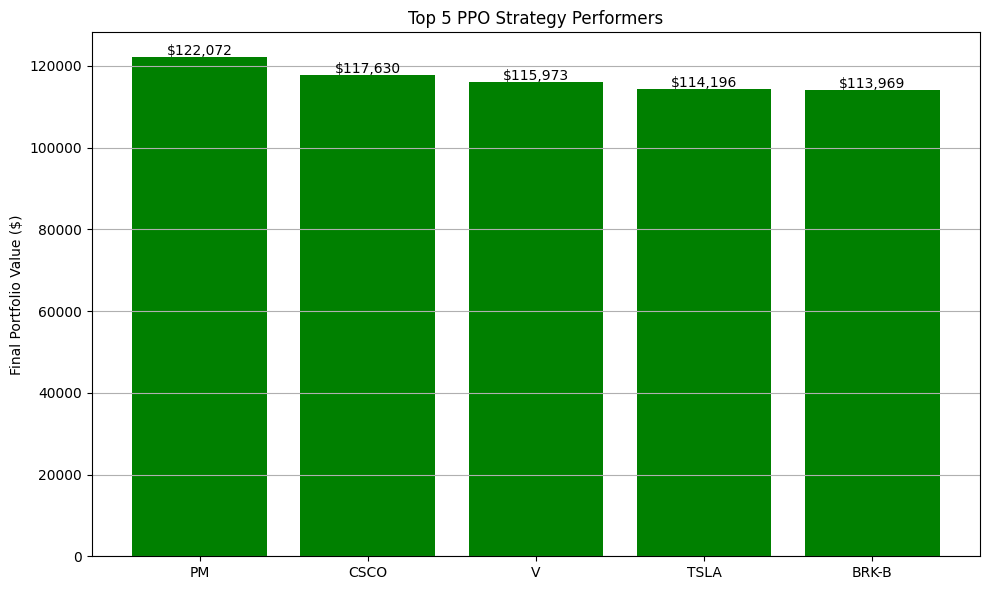

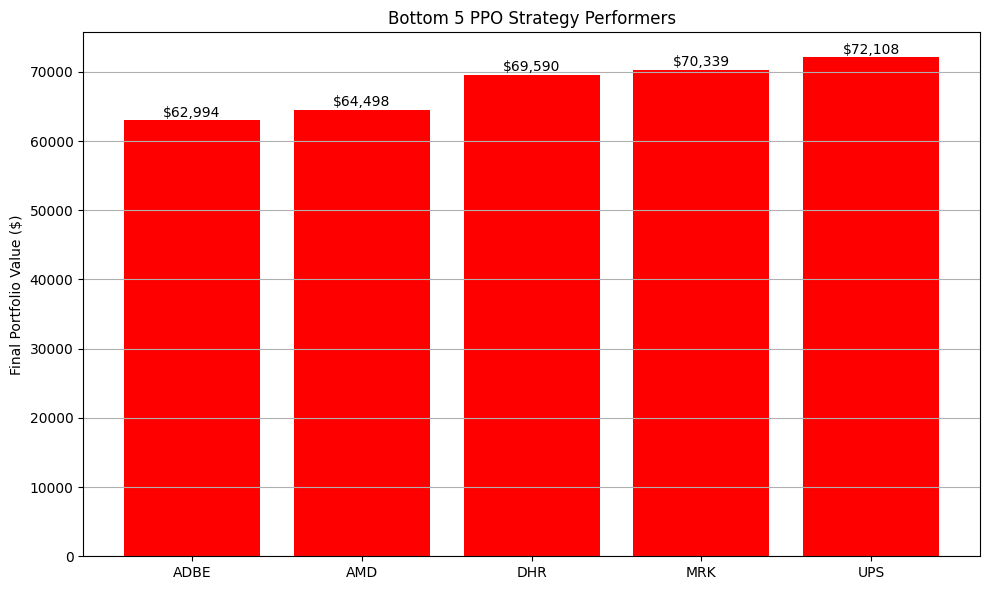

(   Symbol  PPO Final Value  PPO Return  PPO Sharpe
 42     PM    122071.955082   22.071955    0.593415
 24   CSCO    117630.265085   17.630265    0.545828
 10      V    115973.231579   15.973232    0.484546
 0    TSLA    114195.671345   14.195671    0.257337
 6   BRK-B    113968.919543   13.968920    0.451982,
    Symbol  PPO Final Value  PPO Return  PPO Sharpe
 30   ADBE     62994.118843  -37.005881   -0.712893
 37    AMD     64497.879268  -35.502121   -0.508954
 31    DHR     69590.315675  -30.409684   -0.827607
 16    MRK     70338.690248  -29.661310   -0.813807
 40    UPS     72108.343786  -27.891656   -0.602301)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import gc
import torch

#Adjust path if needed
summary_path = "/content/drive/MyDrive/TradingResults/ppo_multi_stock_v2_summary.csv"
summary_df = pd.read_csv(summary_path)

#Top 5
top_5 = summary_df.sort_values(by="PPO Final Value", ascending=False).head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5["Symbol"], top_5["PPO Final Value"], color='green')
plt.title("Top 5 PPO Strategy Performers")
plt.ylabel("Final Portfolio Value ($)")
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"${yval:,.0f}", ha='center')
plt.tight_layout()
plt.show()

#Bottom 5
bottom_5 = summary_df.sort_values(by="PPO Final Value", ascending=True).head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_5["Symbol"], bottom_5["PPO Final Value"], color='red')
plt.title("Bottom 5 PPO Strategy Performers")
plt.ylabel("Final Portfolio Value ($)")
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"${yval:,.0f}", ha='center')
plt.tight_layout()
plt.show()

#Clean GPU memory
gc.collect()
torch.cuda.empty_cache()

#Optional: display top & bottom performers
(top_5[["Symbol", "PPO Final Value", "PPO Return", "PPO Sharpe"]],
 bottom_5[["Symbol", "PPO Final Value", "PPO Return", "PPO Sharpe"]])
